In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')
# pd.options.mode.chained_assignment = None  # default='warn'

In [226]:
# !gdown 1vuN_D5XG_Fc_vbayAbJ3SJaYfYN0JGnj

In [227]:
# df = pd.read_csv('./VN_housing_dataset.csv')
df = pd.read_csv('./VN_housing_dataset.csv')
lat_long_df = pd.read_csv('./result_df.csv')
lat_long_df_2 = pd.read_csv('./result_df_2.csv')

In [228]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna(subset = ['Ngày'])
df['Ngày']= pd.to_datetime(df['Ngày'])

In [229]:
df.head(3)

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82496 entries, 0 to 82495
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             82496 non-null  datetime64[ns]
 1   Địa chỉ          82449 non-null  object        
 2   Quận             82495 non-null  object        
 3   Huyện            82449 non-null  object        
 4   Loại hình nhà ở  82465 non-null  object        
 5   Giấy tờ pháp lý  53610 non-null  object        
 6   Số tầng          36399 non-null  object        
 7   Số phòng ngủ     82458 non-null  object        
 8   Diện tích        82495 non-null  object        
 9   Dài              19827 non-null  object        
 10  Rộng             35445 non-null  object        
 11  Giá/m2           82484 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 8.2+ MB


In [231]:
df = df.dropna(subset=['Địa chỉ'])

In [232]:
df.loc[df['Quận'].isna(), 'Quận'] = 'Huyện Thanh Trì'

In [233]:
df.rename(columns = {'Loại hình nhà ở':'Loại_hình_nhà_ở', 'Giấy tờ pháp lý':'Giấy_tờ_pháp_lý',
                              'Số phòng ngủ':'Số_phòng_ngủ', 'Diện tích': 'Diện_tích', 'Địa chỉ': 'Địa_chỉ'}, inplace = True)

df['Huyện'].fillna('Chưa rõ', inplace=True)
df['Loại_hình_nhà_ở'].fillna('Chưa rõ', inplace=True)
df['Giấy_tờ_pháp_lý'].fillna('Chưa rõ', inplace=True)
df['Số_phòng_ngủ'].fillna('Chưa rõ', inplace=True)
df['Giá/m2'].fillna('Chưa rõ', inplace=True)

In [234]:
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số tầng,Số_phòng_ngủ,Diện_tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


In [235]:
# Drop cột 'Số tầng' do có giá trị null có nhiều
df = df.drop('Số tầng', axis = 1)
df = df.dropna(subset=['Diện_tích'])

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82448 entries, 0 to 82495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             82448 non-null  datetime64[ns]
 1   Địa_chỉ          82448 non-null  object        
 2   Quận             82448 non-null  object        
 3   Huyện            82448 non-null  object        
 4   Loại_hình_nhà_ở  82448 non-null  object        
 5   Giấy_tờ_pháp_lý  82448 non-null  object        
 6   Số_phòng_ngủ     82448 non-null  object        
 7   Diện_tích        82448 non-null  object        
 8   Dài              19827 non-null  object        
 9   Rộng             35443 non-null  object        
 10  Giá/m2           82448 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 7.5+ MB


# Loại bỏ outlier ở cột `Diện tích`

In [237]:
df['Diện_tích'] = df['Diện_tích'].str.replace(' m²', '').astype(float)
df['Dài'] = df['Dài'].str.replace(' m', '').astype(float)
df['Rộng'] = df['Rộng'].str.replace(' m', '').astype(float)

In [238]:
# Kiểm tra liệu có dòng nào với Dài * Rộng != Diện tích
rows_with_incorrect_area = df[np.abs(df['Dài'] * df['Rộng'] - df['Diện_tích']) > 1e-6]
if rows_with_incorrect_area.empty:
    print('All rows are correct. No need to change.')
else:
    print(rows_with_incorrect_area[['Dài', 'Rộng', 'Diện_tích']])

        Dài  Rộng  Diện_tích
5      12.1   3.8       46.0
8      12.0   6.5       75.0
14     15.2   3.9       52.8
15     12.0   4.2       52.0
28     12.0   4.2       45.0
...     ...   ...        ...
82355  13.0   3.0       37.0
82356  16.0   6.0      100.0
82359  14.0   5.0       80.0
82361  20.0   4.0       89.0
82362  20.0   4.0       90.0

[14321 rows x 3 columns]


Dataframe's shape before: (82448, 11) 

Dataframe's shape after: (80924, 11) 



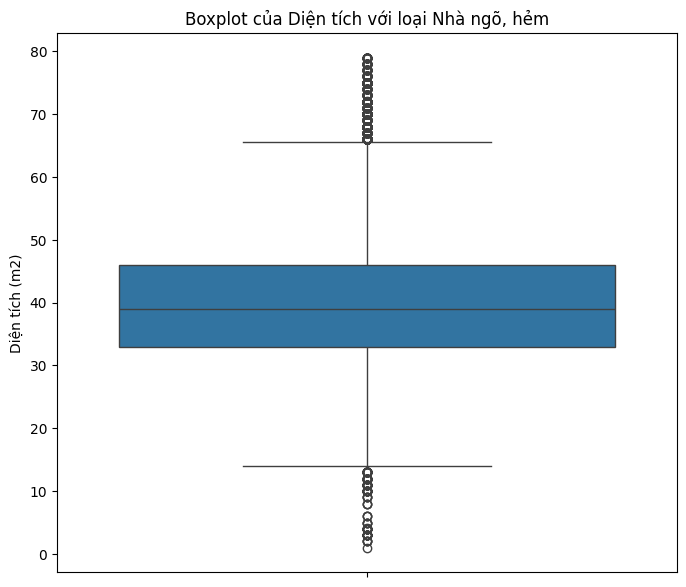

In [239]:
rows_to_drop = df.query('Diện_tích >= 80 & Loại_hình_nhà_ở == "Nhà ngõ, hẻm"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà ngõ, hẻm'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà ngõ, hẻm')
plt.show()

Dataframe's shape before: (80924, 11) 

Dataframe's shape after: (80879, 11) 



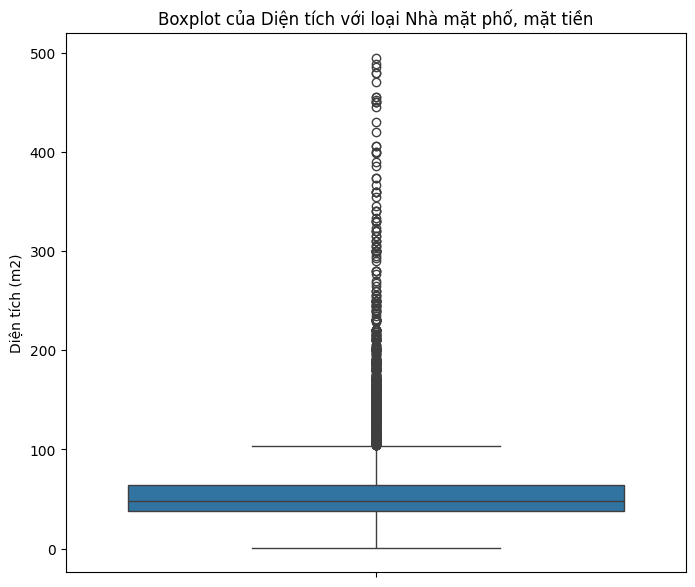

In [240]:
rows_to_drop = df.query('Diện_tích >= 500 & Loại_hình_nhà_ở == "Nhà mặt phố, mặt tiền"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà mặt phố, mặt tiền'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà mặt phố, mặt tiền')
plt.show()


Dataframe's shape before: (80879, 11) 

Dataframe's shape after: (80865, 11) 



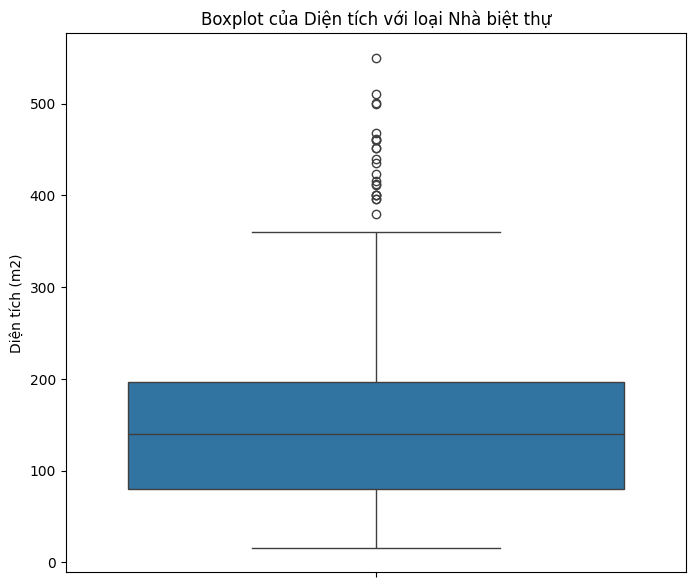

In [241]:
rows_to_drop = df.query('Diện_tích > 550 & Loại_hình_nhà_ở == "Nhà biệt thự"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà biệt thự'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà biệt thự')
plt.show()

Dataframe's shape before: (80865, 11) 

Dataframe's shape after: (80855, 11) 



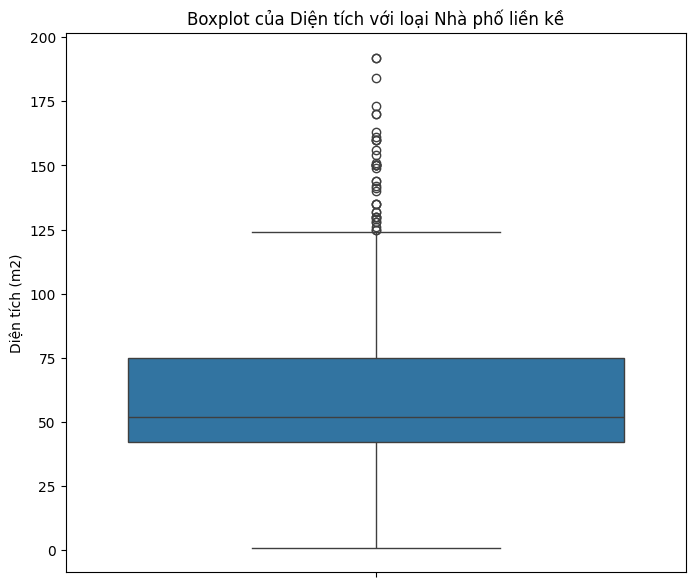

In [242]:
rows_to_drop = df.query('Diện_tích > 192 & Loại_hình_nhà_ở == "Nhà phố liền kề"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà phố liền kề'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà phố liền kề')
plt.show()


In [243]:
df = df.drop(['Dài', 'Rộng'], axis = 1)

In [244]:
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65 triệu/m²


In [245]:
# Select rows where the 'Giá/m2' column contains the string 'tỷ/m²'
rows = df[df['Giá/m2'].str.contains('tỷ/m²')]

# Print the selected rows
print(rows['Giá/m2'])

1100     1,202777777 tỷ/m²
1144     1,142857142 tỷ/m²
1657            1,96 tỷ/m²
2849     1,557142857 tỷ/m²
2939     1,316666666 tỷ/m²
               ...        
78107    5,833333333 tỷ/m²
79034         1,0125 tỷ/m²
79835    1,706666666 tỷ/m²
80222            1,5 tỷ/m²
81845    2,538461538 tỷ/m²
Name: Giá/m2, Length: 116, dtype: object


In [246]:
def is_valid_price(price_string):
    # Kiểm tra nếu giá trị chứa nhiều hơn một dấu phẩy
    if price_string.count(',') > 1:
        return False
    return True

def convert_price_unit(price_string):
  if 'tỷ/m²' in price_string:
    # Remove 'tỷ/m²' and multiply by 1000 to convert to triệu/m²
    price_string = price_string.replace('tỷ/m²', '').replace('.', '').replace(',', '.')
    return float(price_string) * 1000
  elif 'đ/m²' in price_string:
    # Remove 'đ/m²' and divide by 1000000 to convert to triệu/m²
    price_string = price_string.replace('đ/m²', '').replace(',', '.')
    return float(price_string) / 1000000
  elif 'triệu/m²' in price_string:
    # Remove 'triệu/m²'
    price_string = price_string.replace('triệu/m²', '').replace(',', '.')
    return float(price_string)

# Lọc bỏ các giá trị không hợp lệ
df = df[df['Giá/m2'].apply(is_valid_price)]

# Áp dụng hàm convert_price_unit
df['Giá/m2'] = df['Giá/m2'].apply(convert_price_unit)

# Đổi tên cột
df.rename(columns={'Giá/m2': 'Giá'}, inplace=True)

# Hiển thị dataframe
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00


Dataframe's shape before: (80855, 9) 

Dataframe's shape after: (80815, 9) 



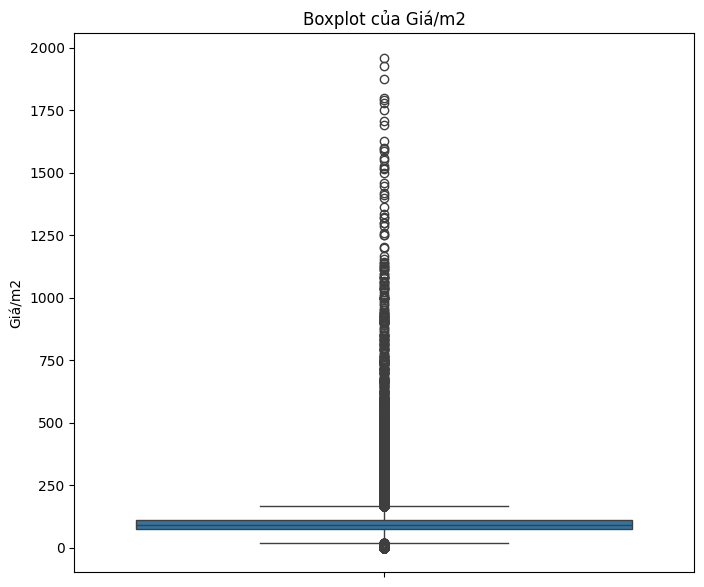

In [247]:
rows_to_drop = df.query('Giá >= 2000').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df['Giá'])
plt.ylabel('Giá/m2')
plt.title('Boxplot của Giá/m2')
plt.show()

df.rename(columns={'Giá': 'Giá/m2 (triệu/m2)'}, inplace=True)

In [248]:
# Tính giá trị trung bình của cột 'Gia' cho các hàng được lọc
mean_value = df['Giá/m2 (triệu/m2)'].mean()

# Thay thế các giá trị trong cột 'Gia' của các hàng được lọc bằng giá trị trung bình
df.loc[df['Giá/m2 (triệu/m2)'] <= 10, 'Giá/m2 (triệu/m2)'] = mean_value
def calculate_total_price(row):
  if row['Giá/m2 (triệu/m2)'] == 'Chưa rõ':
    return 'Chưa rõ'
  else:
    return row['Giá/m2 (triệu/m2)'] * row['Diện_tích']

df['Tổng_giá (Triệu đồng)'] = df.apply(calculate_total_price, axis=1)
# Tính trung bình của cột 'Tổng_giá (Triệu đồng)' mà không bao gồm các giá trị 'Chưa rõ'
mean_price = df[df['Tổng_giá (Triệu đồng)'] != 'Chưa rõ']['Tổng_giá (Triệu đồng)'].mean()

# Điền giá trị trung bình vào các hàng có giá trị 'Chưa rõ'
df['Tổng_giá (Triệu đồng)'] = df['Tổng_giá (Triệu đồng)'].apply(lambda x: mean_price if x == 'Chưa rõ' else x)
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96,4000.16
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22,4300.14
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00,2600.00


In [249]:
# Hàm để trích xuất tên đường từ địa chỉ
def extract_street(address):
    match = re.search(r'(Đường|phố|Phố) [^,]+', address)
    if match:
        return match.group(0)
    return None

# Áp dụng hàm để tạo cột 'Đường'
df['Đường'] = df['Địa_chỉ'].apply(extract_street)

In [250]:
# df['lat'] = lat_long_df['lat']
# df['long'] = lat_long_df['long']

In [251]:
# # Điền giá trị NaN dựa trên "Địa_chỉ"
# df['lat'] = df.groupby('Địa_chỉ')['lat'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# df['long'] = df.groupby('Địa_chỉ')['long'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# # Điền giá trị NaN dựa trên "Đường"
# df['lat'] = df.groupby('Đường')['lat'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# df['long'] = df.groupby('Đường')['long'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# df.set_index('Địa_chỉ', inplace=True)
# lat_long_df.set_index('Địa_chỉ', inplace=True)

# # Điền giá trị thiếu trong df bằng giá trị từ lat_long_df
# df['lat'] = df['lat'].fillna(lat_long_df['lat'])
# df['long'] = df['long'].fillna(lat_long_df['long'])

# # Đặt lại index nếu cần thiết
# df.reset_index(inplace=True)


In [252]:
# # Tính tỷ lệ giá trị thiếu
# missing_ratio_lat = df['lat'].isnull().mean()
# missing_ratio_long = df['long'].isnull().mean()

# print(f"Tỷ lệ giá trị thiếu của cột 'lat': {missing_ratio_lat:.2%}")
# print(f"Tỷ lệ giá trị thiếu của cột 'long': {missing_ratio_long:.2%}")

In [253]:
# df[df['lat'].isna() & df['Đường'].isna()]

In [254]:
df[df['Địa_chỉ'].str.contains('Đường Nguyễn Thị Thập, Phường Trung Hoà, Quận', na=False)]


,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng),Đường
69095,2020-06-17,"Đường Nguyễn Thị Thập, Phường Trung Hoà, Quận ...",Quận Cầu Giấy,Phường Trung Hoà,Nhà phố liền kề,Đã có sổ,5 phòng,81.0,333.33,26999.73,Đường Nguyễn Thị Thập
82439,2020-03-06,"Đường Nguyễn Thị Thập, Phường Trung Hoà, Quận ...",Quận Cầu Giấy,Phường Trung Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,5 phòng,81.0,333.33,26999.73,Đường Nguyễn Thị Thập


In [255]:
# lat_long_df_2[lat_long_df_2['lat'].notna()]

In [256]:
# # Tạo một bản sao của lat_long_df_2 có chỉ lấy các dòng có giá trị lat và long không phải NaN
# filtered_lat_long_df = lat_long_df_2.dropna(subset=['lat', 'long'])

# # Tạo một bản đồ từ 'Địa_chỉ' sang 'lat' và 'long'
# address_to_lat_map = filtered_lat_long_df.set_index('Địa_chỉ')['lat'].to_dict()
# address_to_long_map = filtered_lat_long_df.set_index('Địa_chỉ')['long'].to_dict()

# # Điền các giá trị NaN trong 'lat' của df từ bản đồ
# df.loc[df['lat'].isna(), 'lat'] = df['Địa_chỉ'].map(address_to_lat_map)

# # Điền các giá trị NaN trong 'long' của df từ bản đồ
# df.loc[df['long'].isna(), 'long'] = df['Địa_chỉ'].map(address_to_long_map)

In [257]:
df['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
       'Huyện Mê Linh', 'Huyện Quốc Oai', 'Huyện Phú Xuyên',
       'Huyện Thạch Thất', 'Huyện Mỹ Đức', 'Huyện Ba Vì',
       'Huyện Phúc Thọ'], dtype=object)

In [258]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Khởi tạo geolocator
# geolocator = Nominatim(user_agent="openstreetmap.org")

# # Địa chỉ cần tìm tọa độ
# address = ['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
#        'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
#        'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
#        'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
#        'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
#        'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
#        'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
#        'Huyện Mê Linh', 'Huyện Quốc Oai', 'Huyện Phú Xuyên',
#        'Huyện Thạch Thất', 'Huyện Ba Vì', 'Huyện Mỹ Đức',
#        'Huyện Phúc Thọ']

# # Sử dụng geolocator để tìm tọa độ
# location = geolocator.geocode(address)

# # In ra kinh độ và vĩ độ
# print((location.latitude, location.longitude))
# # (20.9944171, 105.8171316)

In [259]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Khởi tạo geolocator
geolocator = Nominatim(user_agent="openstreetmap.org")

# Sử dụng RateLimiter để tránh bị chặn bởi API
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Giả sử df đã tồn tại với cột 'Quận'
address = ['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
       'Huyện Mê Linh', 'Huyện Quốc Oai', 'Huyện Phú Xuyên',
       'Huyện Thạch Thất', 'Huyện Ba Vì', 'Huyện Mỹ Đức',
       'Huyện Phúc Thọ']

# Tạo DataFrame từ danh sách địa chỉ

# Loại bỏ các giá trị trùng lặp nếu cần thiết
unique_addresses = df['Quận'].unique()

# Tạo dictionary để lưu trữ kết quả geocode
location_dict = {}

# Lấy tọa độ cho từng địa chỉ
for address in unique_addresses:
    location = geocode(address)
    if location:
        location_dict[address] = (location.latitude, location.longitude)
    else:
        location_dict[address] = (None, None)

# Tạo các cột Latitude và Longitude dựa trên dictionary
df['Latitude'] = df['Quận'].apply(lambda x: location_dict[x][0])
df['Longitude'] = df['Quận'].apply(lambda x: location_dict[x][1])



In [260]:
from unidecode import unidecode
df['Quan'] = df['Quận'].apply(lambda x: unidecode(x))

In [261]:
import re


# Loại bỏ các từ 'Quan', 'Huyen', 'Thi xa' trong cột 'Quan'
df['Quan'] = df['Quan'].replace(['Quan Nam Tu Liem', 'Quan Bac Tu Liem'], 'Quan Tu Liem')
df['Quan'] = df['Quan'].str.replace(r'\b(Quan|Huyen|Thi xa)\b', '', regex=True).str.strip()

In [262]:
df

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng),Đường,Latitude,Longitude,Quan
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96,4000.16,Đường Hoàng Quốc Việt,21.029501,105.791421,Cau Giay
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22,4300.14,Đường Kim Giang,20.994417,105.817132,Thanh Xuan
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00,2600.00,phố minh khai,21.006470,105.857852,Hai Ba Trung
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,6 phòng,51.0,100.00,5100.00,Đường Võng Thị,21.068358,105.824098,Tay Ho
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa rõ,4 phòng,36.0,86.11,3099.96,Đường Kim Giang,20.994417,105.817132,Thanh Xuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82491,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,Chưa rõ,3 phòng,38.0,81.58,3100.04,Đường Hồ Tùng Mậu,21.071255,105.764486,Tu Liem
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,50.0,292.00,14600.00,Đường Trần Quốc Hoàn,21.029501,105.791421,Cau Giay
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,4 phòng,41.0,341.46,13999.86,Đường Nguyễn Khánh Toàn,21.029501,105.791421,Cau Giay
82494,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,60.0,101.67,6100.20,Đường Quan Hoa,21.029501,105.791421,Cau Giay


In [263]:
# # Khởi tạo geolocator
# geolocator = Nominatim(user_agent="openstreetmap.org")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Hàm để lấy tọa độ từ địa chỉ
# def get_coordinates(address):
#     location = geocode(address)
#     if location:
#         return location.latitude, location.longitude
#     return None, None

# # Lấy danh sách các địa chỉ duy nhất
# unique_addresses = df['Địa_chỉ'].unique()

# # Tạo một DataFrame từ danh sách các địa chỉ duy nhất
# unique_df = pd.DataFrame(unique_addresses, columns=['Địa_chỉ'])

# # Chia DataFrame thành các chunk nhỏ
# chunk_size = 100  # Điều chỉnh số lượng dòng trong mỗi chunk theo nhu cầu
# chunks = [unique_df[i:i + chunk_size] for i in range(0, unique_df.shape[0], chunk_size)]

# # Tạo danh sách để lưu trữ các chunk đã xử lý
# processed_chunks = []

# # Xử lý từng chunk
# for chunk in chunks:
#     chunk['lat'], chunk['long'] = zip(*chunk['Địa_chỉ'].apply(get_coordinates))
#     processed_chunks.append(chunk)

# # Gộp lại các chunk sau khi đã xử lý
# processed_unique_df = pd.concat(processed_chunks, ignore_index=True)

# # Merge lại với DataFrame gốc
# result_df = pd.merge(df, processed_unique_df, on='Địa_chỉ', how='left')

# # In DataFrame kết quả
# print(result_df)

In [264]:
# # Khởi tạo geolocator
# geolocator = Nominatim(user_agent="openstreetmap.org")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Hàm để lấy tọa độ từ địa chỉ
# def get_coordinates(address):
#     location = geocode(address)
#     if location:
#         print(location.latitude, location.longitude)
#         return location.latitude, location.longitude
#     return None, None

# unique_to_process = df[df['lat'].isna() & df['Đường'].isna()]['Địa_chỉ'].unique()

# # Tạo một DataFrame từ danh sách các địa chỉ cần xử lý
# unique_to_process_df = pd.DataFrame(unique_to_process, columns=['Địa_chỉ'])

# # Xử lý từng địa chỉ để lấy tọa độ
# unique_to_process_df['lat'], unique_to_process_df['long'] = zip(*unique_to_process_df['Địa_chỉ'].apply(get_coordinates))

# # Merge lại với DataFrame gốc
# result_df = pd.merge(df, unique_to_process_df, on='Địa_chỉ', how='left', suffixes=('_orig', ''))

# # In DataFrame kết quả
# print(result_df)

In [265]:
df[df['Quận'] == 'Quận Ba Đình']

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng),Đường,Latitude,Longitude,Quan
30,2020-08-04,"Đường Núi Trúc, Phường Ngọc Khánh, Quận Ba Đìn...",Quận Ba Đình,Phường Ngọc Khánh,"Nhà ngõ, hẻm",Đã có sổ,2 phòng,18.0,69.44,1249.92,Đường Núi Trúc,21.036538,105.828591,Ba Dinh
38,2020-08-04,"Đội Cấn, Phường Cống Vị, Quận Ba Đình, Hà Nội",Quận Ba Đình,Phường Cống Vị,"Nhà ngõ, hẻm",Đã có sổ,3 phòng,25.0,96.00,2400.00,None,21.036538,105.828591,Ba Dinh
40,2020-08-04,"Đường Vĩnh Phúc, Phường Vĩnh Phúc, Quận Ba Đìn...",Quận Ba Đình,Phường Vĩnh Phúc,"Nhà ngõ, hẻm",Đã có sổ,2 phòng,35.0,80.86,2830.10,Đường Vĩnh Phúc,21.036538,105.828591,Ba Dinh
49,2020-08-04,"Đường Núi Trúc, Phường Trúc Bạch, Quận Ba Đình...",Quận Ba Đình,Phường Trúc Bạch,"Nhà ngõ, hẻm",Đã có sổ,2 phòng,18.0,69.44,1249.92,Đường Núi Trúc,21.036538,105.828591,Ba Dinh
51,2020-08-04,"Đường Đào Tấn, Phường Cống Vị, Quận Ba Đình, H...",Quận Ba Đình,Phường Cống Vị,"Nhà ngõ, hẻm",Đã có sổ,7 phòng,55.0,309.09,16999.95,Đường Đào Tấn,21.036538,105.828591,Ba Dinh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82390,2020-04-01,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Quận Ba Đình,Phường Đội Cấn,"Nhà mặt phố, mặt tiền",Đã có sổ,4 phòng,31.0,151.61,4699.91,Đường Đội Cấn,21.036538,105.828591,Ba Dinh
82391,2020-03-31,"Đường Hoàng Hoa Thám, Phường Vĩnh Phúc, Quận B...",Quận Ba Đình,Phường Vĩnh Phúc,"Nhà mặt phố, mặt tiền",Đã có sổ,3 phòng,41.0,91.46,3749.86,Đường Hoàng Hoa Thám,21.036538,105.828591,Ba Dinh
82438,2020-03-09,"Đường Kim Mã, Phường Kim Mã, Quận Ba Đình, Hà Nội",Quận Ba Đình,Phường Kim Mã,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,52.0,86.54,4500.08,Đường Kim Mã,21.036538,105.828591,Ba Dinh
82474,2020-02-09,"Đường Hồng Hà, Phường Phúc Xá, Quận Ba Đình, H...",Quận Ba Đình,Phường Phúc Xá,"Nhà ngõ, hẻm",Đã có sổ,3 phòng,32.0,375.00,12000.00,Đường Hồng Hà,21.036538,105.828591,Ba Dinh


In [266]:
# # Tính giá trị trung bình của cột 'Gia' cho các hàng được lọc
# mean_value = df['Giá/m2 (triệu/m2)'].mean()
df[df['Quận'] == 'Huyện Thạch Thất']
# # Thay thế các giá trị trong cột 'Gia' của các hàng được lọc bằng giá trị trung bình
# df.loc[df['Giá/m2 (triệu/m2)'] <= 10, 'Giá/m2 (triệu/m2)'] = mean_value

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng),Đường,Latitude,Longitude,Quan
44693,2020-07-07,"Đường 419, Xã Tân Xã, Huyện Thạch Thất, Hà Nội",Huyện Thạch Thất,Xã Tân Xã,"Nhà mặt phố, mặt tiền",Đã có sổ,9 phòng,293.0,16.04,4699.72,Đường 419,21.023557,105.553736,Thach That
48534,2020-07-03,"Đường Tỉnh lộ 419, Xã Bình Phú, Huyện Thạch Th...",Huyện Thạch Thất,Xã Bình Phú,"Nhà mặt phố, mặt tiền",Đã có sổ,1 phòng,134.0,24.63,3300.42,Đường Tỉnh lộ 419,21.023557,105.553736,Thach That
48572,2020-07-03,"Đường 21, Xã Bình Phú, Huyện Thạch Thất, Hà Nội",Huyện Thạch Thất,Xã Bình Phú,"Nhà mặt phố, mặt tiền",Đã có sổ,6 phòng,320.0,25.00,8000.00,Đường 21,21.023557,105.553736,Thach That
48579,2020-07-03,"Đường Tỉnh lộ 419, Xã Bình Phú, Huyện Thạch Th...",Huyện Thạch Thất,Xã Bình Phú,"Nhà mặt phố, mặt tiền",Chưa rõ,1 phòng,135.0,24.44,3299.40,Đường Tỉnh lộ 419,21.023557,105.553736,Thach That
67034,2020-06-18,"Đường Quốc Lộ 420, Thị trấn Liên Quan, Huyện T...",Huyện Thạch Thất,Thị trấn Liên Quan,"Nhà mặt phố, mặt tiền",Đã có sổ,3 phòng,95.0,54.74,5200.30,Đường Quốc Lộ 420,21.023557,105.553736,Thach That
70724,2020-06-16,"Đường Đại lộ Thăng Long, Xã Thạch Hoà, Huyện T...",Huyện Thạch Thất,Xã Thạch Hoà,Nhà phố liền kề,Đã có sổ,4 phòng,150.0,19.50,2925.00,Đường Đại lộ Thăng Long,21.023557,105.553736,Thach That
82020,2020-06-06,"Đường 21, Xã Thạch Hoà, Huyện Thạch Thất, Hà Nội",Huyện Thạch Thất,Xã Thạch Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,2 phòng,51.0,26.47,1349.97,Đường 21,21.023557,105.553736,Thach That


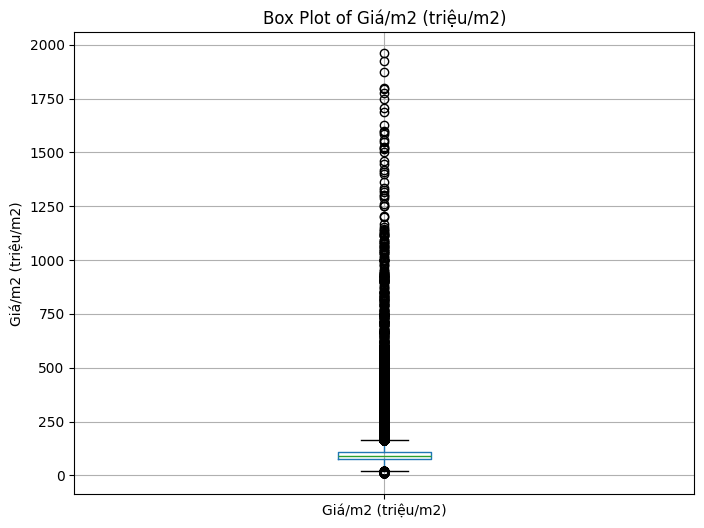

In [267]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Giá/m2 (triệu/m2)')
plt.title('Box Plot of Giá/m2 (triệu/m2)')
plt.ylabel('Giá/m2 (triệu/m2)')
plt.show()

# Xử lý thêm cột kinh độ, vĩ độ từ cột địa chỉ.

In [268]:
df.to_csv('VN_housing_dataset_preprocessed.csv',index=False)
# result_df.to_csv('result_df_2.csv',index=False)